In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1. Problem statement

In [ ]:
To predict the weigth of the fish...by using given data

dependent varible > weight

### 2. Data gathering

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Automobile_data.csv',
 'BIKE DETAILS.csv',
 'car data.csv',
 'car_price.jpg',
 'car_price_prediction .ipynb',
 'Car_price_prediction.csv',
 'corr_matrix.jpg',
 'Employees_data.xlsx',
 'emplyee_salary_prediction.ipynb',
 'Fish (1).csv',
 'fish_weight pridiction.ipynb',
 'kiggle project.ipynb',
 'Public.csv',
 'public_kiggle problem.ipynb',
 'sql_work_in crime.ipynb',
 'startup_funding2018.csv',
 'Stores (1).csv',
 'us crime_prject.ipynb',
 'us_crime_dataset.xlsx',
 'X_test.csv',
 'X_test_project.ipynb']

In [3]:
df = pd.read_csv("Fish (1).csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df.shape

(159, 7)

In [7]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [9]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### 3. Exploratary Data analysis

In [10]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Weight

<AxesSubplot:xlabel='Weight', ylabel='Count'>

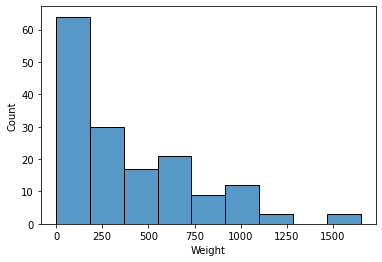

In [12]:
sns.histplot(df["Weight"])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

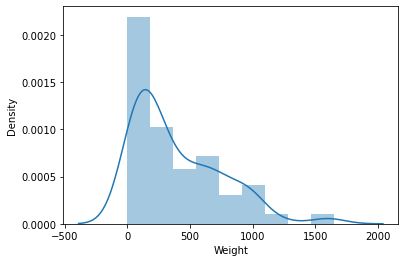

In [14]:
sns.distplot(df["Weight"])

### Lenght1

<AxesSubplot:xlabel='Length1', ylabel='Count'>

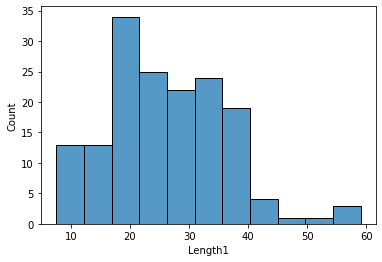

In [16]:
sns.histplot(df["Length1"])

<AxesSubplot:xlabel='Length1', ylabel='Density'>

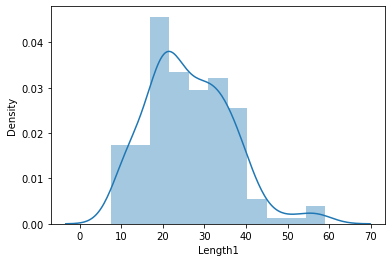

In [18]:
sns.distplot(df["Length1"])

### Length2

<AxesSubplot:xlabel='Length2', ylabel='Count'>

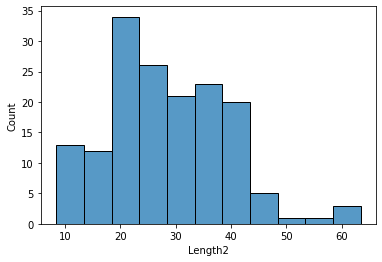

In [19]:
sns.histplot(df["Length2"])

C:\Users\patel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length2', ylabel='Density'>

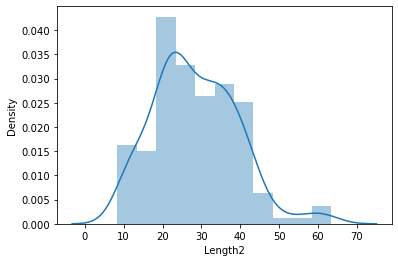

In [20]:
sns.distplot(df["Length2"])

### Length3

<AxesSubplot:xlabel='Length3', ylabel='Count'>

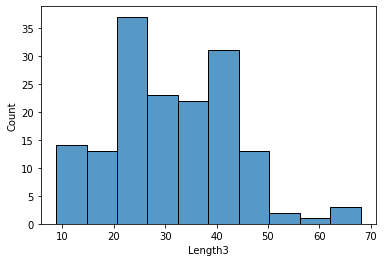

In [21]:
sns.histplot(df["Length3"])

C:\Users\patel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length3', ylabel='Density'>

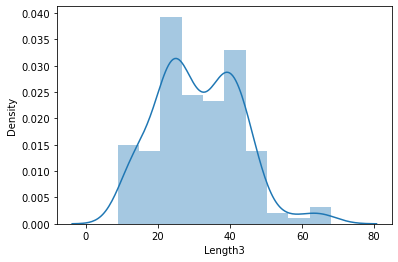

In [22]:
sns.distplot(df["Length3"])

### Height

<AxesSubplot:xlabel='Height', ylabel='Count'>

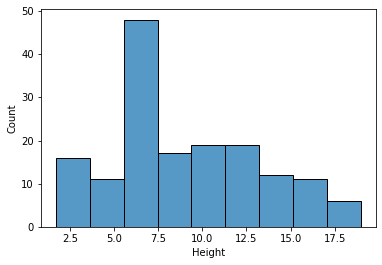

In [23]:
sns.histplot(df["Height"])

C:\Users\patel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

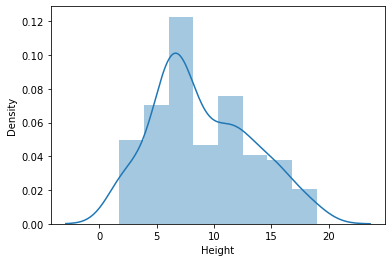

In [24]:
sns.distplot(df["Height"])

### Width

<AxesSubplot:xlabel='Width', ylabel='Count'>

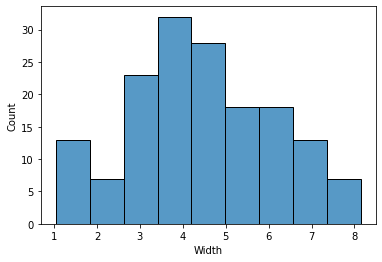

In [25]:
sns.histplot(df["Width"])

C:\Users\patel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Width', ylabel='Density'>

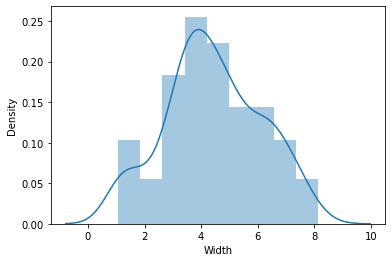

In [26]:
sns.distplot(df["Width"])

### Species

In [28]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

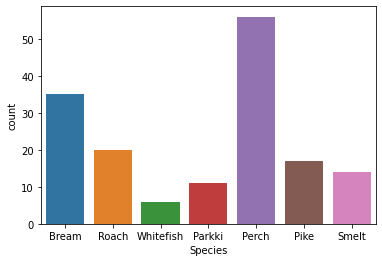

In [29]:
sns.countplot(df["Species"])

<AxesSubplot:>

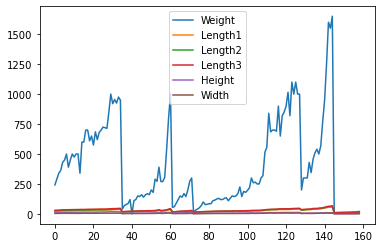

In [32]:
df.plot()

<AxesSubplot:xlabel='Length1', ylabel='Weight'>

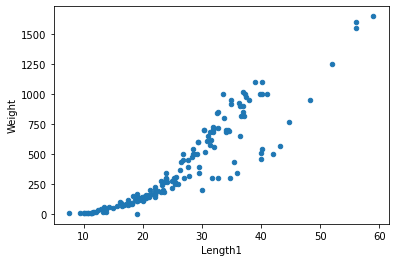

In [33]:
df.plot(x= "Length1",y= "Weight", kind = "scatter")

<AxesSubplot:xlabel='Length2', ylabel='Weight'>

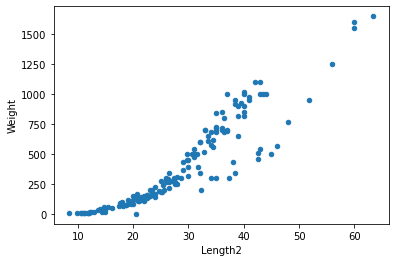

In [34]:
df.plot(x= "Length2",y= "Weight", kind = "scatter")

<AxesSubplot:xlabel='Length3', ylabel='Weight'>

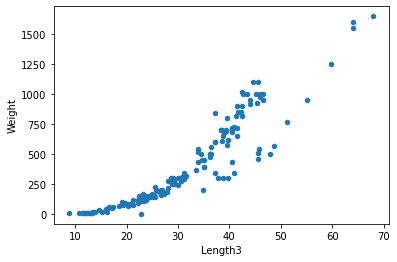

In [35]:
df.plot(x= "Length3",y= "Weight", kind = "scatter")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

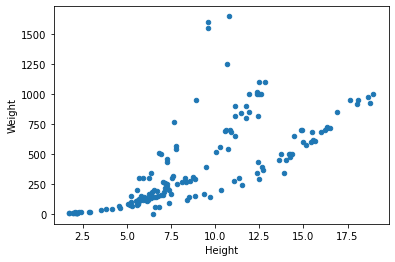

In [36]:
df.plot(x= "Height",y= "Weight", kind = "scatter")

<AxesSubplot:xlabel='Width', ylabel='Weight'>

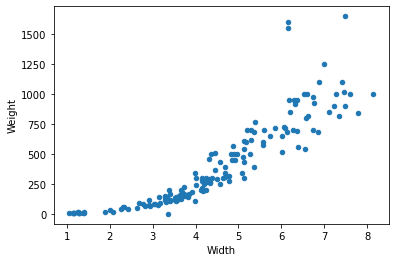

In [37]:
df.plot(x= "Width",y= "Weight", kind = "scatter")

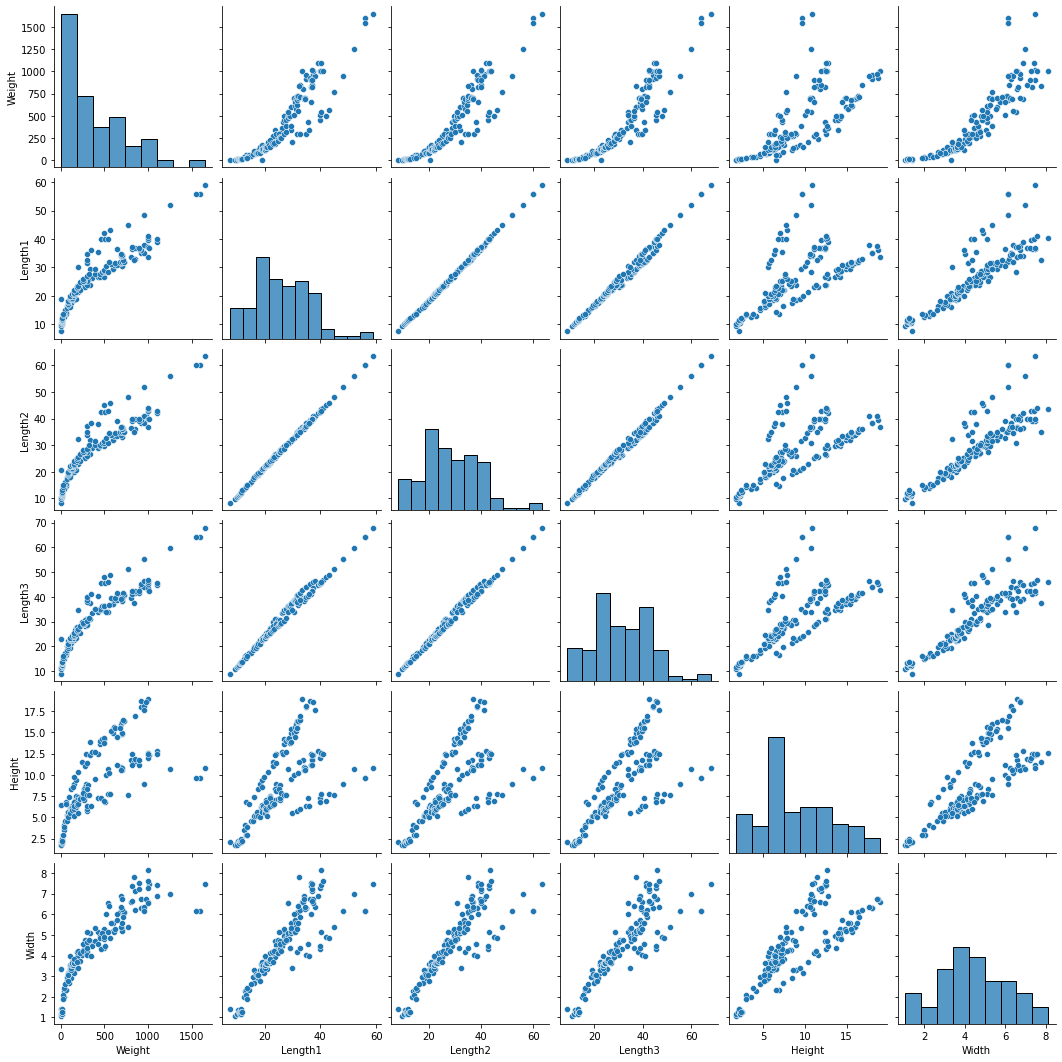

In [38]:
sns.pairplot(df)

### 4. Feature Engineering

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [40]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [43]:
df = pd.get_dummies(df,drop_first = True)

In [44]:
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


### 5. Feature Selection

In [47]:
corr = df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,-0.198718,-0.105478,0.522894,-0.205072,-0.488397,0.052864
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Species_Parkki,-0.186034,-0.205732,-0.205957,-0.198718,-0.000547,-0.194147,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033240,-0.037845,-0.036090,-0.105478,-0.191405,0.144021,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.310641,0.563514,0.552780,0.522894,-0.101810,0.137722,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519
Species_Roach,-0.261784,-0.213250,-0.218048,-0.205072,-0.202076,-0.171465,-0.103413,-0.279694,-0.131247,1.000000,-0.117866,-0.075117


<AxesSubplot:>

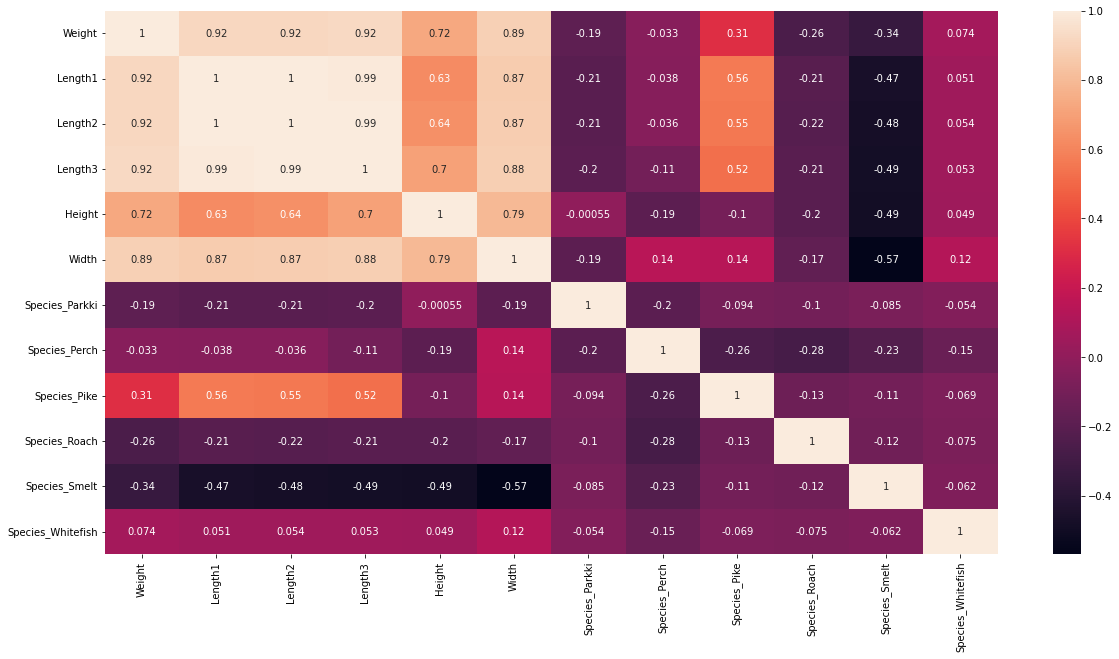

In [50]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot = True)

### 6.Multicolinearity

In [51]:
VIF = Variance inflation factor
vif = 1 to infinity
best value = 1 to 10

SyntaxError: invalid syntax (320867849.py, line 1)

In [53]:
vif_df = pd.DataFrame()
vif_df['Feature'] = df.columns
vif_df

,Feature
0,Weight
1,Length1
2,Length2
3,Length3
4,Height
5,Width
6,Species_Parkki
7,Species_Perch
8,Species_Pike
9,Species_Roach


In [54]:
vif_list = []
for i in range(df.shape[1]):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
    
vif_list

[25.929055552438967,
 18167.609862805464,
 33718.47771024441,
 9472.862674437967,
 249.47401035408956,
 195.24802602265117,
 1.9609872634652312,
 24.040944403782287,
 23.9783567319118,
 5.6790878889636,
 3.000422081339943,
 2.606693187015657]

In [55]:
vif_df['VIF'] = vif_list
vif_df

,Feature,VIF
0,Weight,25.929056
1,Length1,18167.609863
2,Length2,33718.477710
3,Length3,9472.862674
4,Height,249.474010
5,Width,195.248026
6,Species_Parkki,1.960987
7,Species_Perch,24.040944
8,Species_Pike,23.978357
9,Species_Roach,5.679088


### 6.Model building and Training

In [57]:
x = df.drop("Weight",axis = 1)
y = df["Weight"]

### Spliting data in test and train data

In [60]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state = 2)

In [61]:
x_train

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
118,36.6,39.0,41.3,12.4313,7.3514,0,1,0,0,0,0
135,40.0,42.5,45.5,6.8250,4.4590,0,0,1,0,0,0
91,20.5,22.5,24.0,5.8560,3.6240,0,1,0,0,0,0
128,30.0,32.3,34.8,5.5680,3.3756,0,0,1,0,0,0
119,36.9,40.0,42.3,11.9286,7.1064,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
75,15.0,16.2,17.2,4.5924,2.6316,0,1,0,0,0,0
43,20.4,22.0,24.7,5.8045,3.7544,0,0,0,1,0,0
22,31.5,34.5,39.7,15.5227,5.2801,0,0,0,0,0,0
72,7.5,8.4,8.8,2.1120,1.4080,0,1,0,0,0,0


In [62]:
y_train

118    820.0
135    510.0
91     130.0
128    200.0
119    850.0
       ...  
75      51.5
43     150.0
22     620.0
72       5.9
15     600.0
Name: Weight, Length: 127, dtype: float64

### 7.Create instance of model

In [66]:
lr_model= LinearRegression()


In [67]:
lr_model

LinearRegression()

### 8. modelTraining

In [68]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [69]:
x_train

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
118,36.6,39.0,41.3,12.4313,7.3514,0,1,0,0,0,0
135,40.0,42.5,45.5,6.8250,4.4590,0,0,1,0,0,0
91,20.5,22.5,24.0,5.8560,3.6240,0,1,0,0,0,0
128,30.0,32.3,34.8,5.5680,3.3756,0,0,1,0,0,0
119,36.9,40.0,42.3,11.9286,7.1064,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
75,15.0,16.2,17.2,4.5924,2.6316,0,1,0,0,0,0
43,20.4,22.0,24.7,5.8045,3.7544,0,0,0,1,0,0
22,31.5,34.5,39.7,15.5227,5.2801,0,0,0,0,0,0
72,7.5,8.4,8.8,2.1120,1.4080,0,1,0,0,0,0


In [70]:
y_train

118    820.0
135    510.0
91     130.0
128    200.0
119    850.0
       ...  
75      51.5
43     150.0
22     620.0
72       5.9
15     600.0
Name: Weight, Length: 127, dtype: float64

### 9.Model Evalution

In [72]:
y_pred = lr_model.predict(x_test)

In [74]:
y_pred[:5]

array([517.12728018, 448.9024965 ,   8.15852096, 505.33261828,
       326.79726465])

In [76]:
y_test[:5]

12     500.0
3      363.0
153      9.8
6      500.0
129    300.0
Name: Weight, dtype: float64

### 10. Residual

In [77]:
residual = y_test - y_pred

In [78]:
residual

12     -17.127280
3      -85.902497
153      1.641479
6       -5.332618
129    -26.797265
134   -145.364573
71     -99.203278
143    245.743890
29     177.352446
137   -220.565470
127    -14.368829
113     20.980335
138   -168.625239
85     -12.695462
44      22.219395
48     -72.936210
5      -52.375294
24      -9.134152
23     -42.842412
54    -137.359247
41      15.425716
35     215.600209
100    -96.860348
42      20.071507
25      -4.756225
132    -23.563054
65      -1.856389
94     -44.372546
92     -33.094044
2      -27.328048
126    -31.133620
136   -112.727456
Name: Weight, dtype: float64

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### MSE

In [82]:
mse = mean_squared_error(y_test,y_pred)
mse

9782.73658040711

### RMSE

In [84]:
rmse = np.sqrt(mse)
rmse

98.90771749670049

### MAE

In [86]:
mae = mean_absolute_error(y_test,y_pred)
mae

68.9173915936825

### r2_score

In [87]:
r2_value = r2_score(y_test,y_pred)
r2_value

0.9145552928686714

### Adjusted_r2

In [89]:
Adjusted_r2 = 1 - (1 - r2_value)*(x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1)
Adjusted_r2

0.9081614712465992

In [90]:
x_test

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
12,29.1,31.5,36.4,13.7592,4.3680,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
153,11.4,12.0,13.2,2.2044,1.1484,0,0,0,0,1,0
6,26.8,29.7,34.5,14.1795,5.2785,0,0,0,0,0,0
129,31.7,34.0,37.8,5.7078,4.1580,0,0,1,0,0,0
134,40.0,42.5,45.5,7.2800,4.3225,0,0,1,0,0,0
71,24.0,26.0,29.0,11.3680,4.2340,1,0,0,0,0,0
143,56.0,60.0,64.0,9.6000,6.1440,0,0,1,0,0,0
29,33.5,37.0,42.6,18.9570,6.6030,0,0,0,0,0,0
137,42.0,45.0,48.0,6.9600,4.8960,0,0,1,0,0,0


In [95]:
lr_model.predict([[26,29,34,13,5,0,0,0,0,0,0]])    # i predict for row 6

C:\Users\patel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([486.10481875])

In [94]:
df.head(12)

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
5,450.0,26.8,29.7,34.7,13.6024,4.9274,0,0,0,0,0,0
6,500.0,26.8,29.7,34.5,14.1795,5.2785,0,0,0,0,0,0
7,390.0,27.6,30.0,35.0,12.6700,4.6900,0,0,0,0,0,0
8,450.0,27.6,30.0,35.1,14.0049,4.8438,0,0,0,0,0,0
9,500.0,28.5,30.7,36.2,14.2266,4.9594,0,0,0,0,0,0
